# Merge & clean "activity" table from database

In [568]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [530]:
def get_sessions(dataframe):
    dataframe = dataframe.sort_values('timestamp')

    data_sessions = []
    for group in ['A', 'B']:
        group_data = dataframe[dataframe['group'] == group]
        for mode in ['Leaderboard', 'Achievements']:
            mode_data = group_data[group_data['game_mode'] == mode]
            if len(mode_data) > 0:
                start = mode_data.iloc[0]['timestamp']
                end = mode_data.iloc[-1]['timestamp']

                data_sessions.append({
                    'group': group,
                    'game_mode': mode,
                    'start': start,
                    'theoretical_start': end - pd.Timedelta(minutes=20),
                    'theoretical_end': start + pd.Timedelta(minutes=20),
                    'end': end,
                })

    data_sessions = pd.DataFrame(data_sessions)

    return data_sessions.sort_values(['group', 'start'])


In [531]:
activity = "../../data/database/csv/activity.csv"
df = pd.read_csv(activity)

game_mode = "../../data/database/csv/game_mode.csv"
df_game_mode = pd.read_csv(game_mode)

df = df.merge(df_game_mode, left_on="game_mode", right_on="id", how="left")

df["game_mode"] = df["name"]
df = df.drop(columns=["id_x", "id_y", "name"])
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True).dt.tz_convert("Europe/Brussels")

df = df[[col for col in df.columns if col != 'timestamp'] + ['timestamp']]

df

,user,achievement,points,game_mode,timestamp
0,11b1644a-d11f-45cb-8a40-282a209059c0,RefactorAddXAssertionsAchievement,1,Leaderboard,2025-04-17 09:03:37.584413+02:00
1,11b1644a-d11f-45cb-8a40-282a209059c0,AddTestsAchievement,1,Leaderboard,2025-04-17 09:03:37.608230+02:00
2,0d271530-be17-4538-bf04-dde3c6069b5f,AddTestsAchievement,1,Leaderboard,2025-04-17 09:03:49.222756+02:00
3,11b1644a-d11f-45cb-8a40-282a209059c0,RefactorAddXAssertionsAchievement,1,Leaderboard,2025-04-17 09:03:58.246131+02:00
4,11b1644a-d11f-45cb-8a40-282a209059c0,AddTestsAchievement,1,Leaderboard,2025-04-17 09:03:58.276464+02:00
...,...,...,...,...,...
13098,11b1644a-d11f-45cb-8a40-282a209059c0,TriggerXAssertsByTestsAchievement,1,Leaderboard,2025-04-17 10:30:03.500172+02:00
13099,11b1644a-d11f-45cb-8a40-282a209059c0,TriggerXAssertsByTestsAchievement,1,Leaderboard,2025-04-17 10:30:03.521819+02:00
13100,11b1644a-d11f-45cb-8a40-282a209059c0,TriggerXAssertsByTestsAchievement,2,Leaderboard,2025-04-17 10:30:03.539487+02:00
13101,11b1644a-d11f-45cb-8a40-282a209059c0,AddTestsAchievement,1,Leaderboard,2025-04-17 10:42:15.128917+02:00



## Add group

In [532]:
df_first = df.sort_values(by=["timestamp"], ascending=True).groupby("user").last().reset_index()
df_first['group'] = df_first['game_mode'].map({'Leaderboard': 'A', 'Achievements': 'B'})
df = df.merge(df_first[['user', 'group']], on='user', how='left')
df

,user,achievement,points,game_mode,timestamp,group
0,11b1644a-d11f-45cb-8a40-282a209059c0,RefactorAddXAssertionsAchievement,1,Leaderboard,2025-04-17 09:03:37.584413+02:00,A
1,11b1644a-d11f-45cb-8a40-282a209059c0,AddTestsAchievement,1,Leaderboard,2025-04-17 09:03:37.608230+02:00,A
2,0d271530-be17-4538-bf04-dde3c6069b5f,AddTestsAchievement,1,Leaderboard,2025-04-17 09:03:49.222756+02:00,A
3,11b1644a-d11f-45cb-8a40-282a209059c0,RefactorAddXAssertionsAchievement,1,Leaderboard,2025-04-17 09:03:58.246131+02:00,A
4,11b1644a-d11f-45cb-8a40-282a209059c0,AddTestsAchievement,1,Leaderboard,2025-04-17 09:03:58.276464+02:00,A
...,...,...,...,...,...,...
13098,11b1644a-d11f-45cb-8a40-282a209059c0,TriggerXAssertsByTestsAchievement,1,Leaderboard,2025-04-17 10:30:03.500172+02:00,A
13099,11b1644a-d11f-45cb-8a40-282a209059c0,TriggerXAssertsByTestsAchievement,1,Leaderboard,2025-04-17 10:30:03.521819+02:00,A
13100,11b1644a-d11f-45cb-8a40-282a209059c0,TriggerXAssertsByTestsAchievement,2,Leaderboard,2025-04-17 10:30:03.539487+02:00,A
13101,11b1644a-d11f-45cb-8a40-282a209059c0,AddTestsAchievement,1,Leaderboard,2025-04-17 10:42:15.128917+02:00,A


## Remove activity when mode is not valid with experiments settings

### First session

In [533]:
sessions = get_sessions(df)
groups_first_mode = sessions[((sessions["group"] == "A") & (sessions["game_mode"] == "Achievements")) | ((sessions["group"] == "B") & (sessions["game_mode"] == "Leaderboard"))]
groups_first_mode

,group,game_mode,start,theoretical_start,theoretical_end,end
1,A,Achievements,2025-04-17 09:05:22.951686+02:00,2025-04-17 09:34:59.417826+02:00,2025-04-17 09:25:22.951686+02:00,2025-04-17 09:54:59.417826+02:00
2,B,Leaderboard,2025-04-17 09:04:05.435083+02:00,2025-04-17 09:40:45.641312+02:00,2025-04-17 09:24:05.435083+02:00,2025-04-17 10:00:45.641312+02:00


In [534]:
for index, row in groups_first_mode.iterrows():
    print(f"Group {row["group"]} - {row["game_mode"]} | session 1 : {row["start"]} -> {row["theoretical_end"]}")

filtered_list = []
for _, row in groups_first_mode.iterrows():
    filtered = df[
        (df["group"] == row["group"]) &
        (df["game_mode"] != row["game_mode"]) &
        (df["timestamp"] < row["theoretical_end"])
    ]

    filtered_list.append(filtered)

wrong_first_mode = pd.concat(filtered_list, ignore_index=True)
wrong_first_mode

Group A - Achievements | session 1 : 2025-04-17 09:05:22.951686+02:00 -> 2025-04-17 09:25:22.951686+02:00
Group B - Leaderboard | session 1 : 2025-04-17 09:04:05.435083+02:00 -> 2025-04-17 09:24:05.435083+02:00


,user,achievement,points,game_mode,timestamp,group
0,11b1644a-d11f-45cb-8a40-282a209059c0,RefactorAddXAssertionsAchievement,1,Leaderboard,2025-04-17 09:03:37.584413+02:00,A
1,11b1644a-d11f-45cb-8a40-282a209059c0,AddTestsAchievement,1,Leaderboard,2025-04-17 09:03:37.608230+02:00,A
2,0d271530-be17-4538-bf04-dde3c6069b5f,AddTestsAchievement,1,Leaderboard,2025-04-17 09:03:49.222756+02:00,A
3,11b1644a-d11f-45cb-8a40-282a209059c0,RefactorAddXAssertionsAchievement,1,Leaderboard,2025-04-17 09:03:58.246131+02:00,A
4,11b1644a-d11f-45cb-8a40-282a209059c0,AddTestsAchievement,1,Leaderboard,2025-04-17 09:03:58.276464+02:00,A
...,...,...,...,...,...,...
67,9af94b6b-259c-4799-8c79-5960311627bf,AddTestsAchievement,2,Leaderboard,2025-04-17 09:24:31.332772+02:00,A
68,9af94b6b-259c-4799-8c79-5960311627bf,RefactorXTestNamesAchievement,1,Leaderboard,2025-04-17 09:24:31.535522+02:00,A
69,9af94b6b-259c-4799-8c79-5960311627bf,RefactorExtractXMethodsAchievement,1,Leaderboard,2025-04-17 09:24:31.566400+02:00,A
70,9af94b6b-259c-4799-8c79-5960311627bf,RefactorInlineXMethodsAchievement,1,Leaderboard,2025-04-17 09:24:40.786924+02:00,A


In [535]:
cleaned_first_part_df = df.merge(
    wrong_first_mode,
    on=["group", "timestamp", "game_mode"],
    how="left",
    indicator=True
)

cleaned_first_part_df = cleaned_first_part_df[cleaned_first_part_df["_merge"] == "left_only"].drop(columns=["_merge", "user_y", "achievement_y", "points_y"]).rename(columns={"user_x": "user", "achievement_x": "achievement", "points_x": "points"})

sessions = get_sessions(cleaned_first_part_df)
sessions

,group,game_mode,start,theoretical_start,theoretical_end,end
1,A,Achievements,2025-04-17 09:05:22.951686+02:00,2025-04-17 09:34:59.417826+02:00,2025-04-17 09:25:22.951686+02:00,2025-04-17 09:54:59.417826+02:00
0,A,Leaderboard,2025-04-17 09:28:41.873157+02:00,2025-04-17 10:22:17.992506+02:00,2025-04-17 09:48:41.873157+02:00,2025-04-17 10:42:17.992506+02:00
2,B,Leaderboard,2025-04-17 09:04:05.435083+02:00,2025-04-17 09:40:45.641312+02:00,2025-04-17 09:24:05.435083+02:00,2025-04-17 10:00:45.641312+02:00
3,B,Achievements,2025-04-17 09:44:33.184196+02:00,2025-04-17 09:49:02.227524+02:00,2025-04-17 10:04:33.184196+02:00,2025-04-17 10:09:02.227524+02:00


In [536]:
cleaned_first_part_df

,user,achievement,points,game_mode,timestamp,group
5,eed81e54-2343-44af-ab2f-cd062db7e11a,AddTestsAchievement,1,Leaderboard,2025-04-17 09:04:05.435083+02:00,B
6,7b25b9f2-5d8e-401e-aefa-ac31e94575d1,RefactorAddXAssertionsAchievement,2,Leaderboard,2025-04-17 09:04:05.979055+02:00,B
7,7b25b9f2-5d8e-401e-aefa-ac31e94575d1,AddTestsAchievement,1,Leaderboard,2025-04-17 09:04:05.992210+02:00,B
8,7b25b9f2-5d8e-401e-aefa-ac31e94575d1,RunXTestSuitesAchievement,1,Leaderboard,2025-04-17 09:04:09.168499+02:00,B
9,7b25b9f2-5d8e-401e-aefa-ac31e94575d1,RunWithCoverageAchievement,1,Leaderboard,2025-04-17 09:04:09.170740+02:00,B
...,...,...,...,...,...,...
13098,11b1644a-d11f-45cb-8a40-282a209059c0,TriggerXAssertsByTestsAchievement,1,Leaderboard,2025-04-17 10:30:03.500172+02:00,A
13099,11b1644a-d11f-45cb-8a40-282a209059c0,TriggerXAssertsByTestsAchievement,1,Leaderboard,2025-04-17 10:30:03.521819+02:00,A
13100,11b1644a-d11f-45cb-8a40-282a209059c0,TriggerXAssertsByTestsAchievement,2,Leaderboard,2025-04-17 10:30:03.539487+02:00,A
13101,11b1644a-d11f-45cb-8a40-282a209059c0,AddTestsAchievement,1,Leaderboard,2025-04-17 10:42:15.128917+02:00,A


### Get first form submission for second session

In [537]:
output_csv_file = "../../generated/forms/data.csv"

form_data_df = pd.read_csv(output_csv_file)
form_data_df = form_data_df[['Identifiant', 'group', 'Leaderboard Horodateur', 'Achievements Horodateur']]
form_data_df['Leaderboard Horodateur'] = pd.to_datetime(form_data_df['Leaderboard Horodateur'], dayfirst=True)
form_data_df['Achievements Horodateur'] = pd.to_datetime(form_data_df['Achievements Horodateur'], dayfirst=True)

group_a_first_timestamps = form_data_df[form_data_df['group'] == 'A']['Leaderboard Horodateur'].min() - pd.Timedelta(minutes=5)
print(f"Group A - leadearboard form first submission: {group_a_first_timestamps}")

group_b_first_timestamps = form_data_df[form_data_df['group'] == 'B']['Achievements Horodateur'].min() - pd.Timedelta(minutes=5)
print(f"Group B - achievements form first submission: {group_b_first_timestamps}")

Group A - leadearboard form first submission: 2025-04-17 10:03:54
Group B - achievements form first submission: 2025-04-17 10:01:54


### Second session

In [574]:
sessions = get_sessions(cleaned_first_part_df)
groups_second_mode = (sessions[(
    (sessions["group"] == "A") & (sessions["game_mode"] == "Leaderboard")) |
    ((sessions["group"] == "B") & (sessions["game_mode"] == "Achievements"))
].copy())

groups_second_mode.loc[:, "end"] = groups_second_mode["group"].apply(lambda x: group_a_first_timestamps if x == "A" else group_b_first_timestamps)
groups_second_mode["theoretical_start"] = groups_second_mode["end"] - pd.Timedelta(minutes=20)
groups_second_mode

C:\Users\thiba\AppData\Local\Temp\ipykernel_25596\1946124215.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<DatetimeArray>
['2025-04-17 10:03:54', '2025-04-17 10:01:54']
Length: 2, dtype: datetime64[ns]' has dtype incompatible with datetime64[ns, Europe/Brussels], please explicitly cast to a compatible dtype first.
  groups_second_mode.loc[:, "end"] = groups_second_mode["group"].apply(lambda x: group_a_first_timestamps if x == "A" else group_b_first_timestamps)


,group,game_mode,start,theoretical_start,theoretical_end,end
0,A,Leaderboard,2025-04-17 09:28:41.873157+02:00,2025-04-17 09:43:54,2025-04-17 09:48:41.873157+02:00,2025-04-17 10:03:54
3,B,Achievements,2025-04-17 09:44:33.184196+02:00,2025-04-17 09:41:54,2025-04-17 10:04:33.184196+02:00,2025-04-17 10:01:54


In [573]:
for index, row in groups_second_mode.iterrows():
    print(f"Group {row["group"]} - {row["game_mode"]} | session 2 : {row["theoretical_start"]} -> {row["end"]}")

filtered_list = []
for _, row in groups_second_mode.iterrows():
    filtered = cleaned_first_part_df[
        (cleaned_first_part_df["group"] == row["group"]) &
        (cleaned_first_part_df["game_mode"] != row["game_mode"]) &
        ((cleaned_first_part_df["timestamp"] < row["theoretical_start"]) | (cleaned_first_part_df["timestamp"] > row["end"]))
    ]

    filtered_list.append(filtered)

wrong_second_mode = pd.concat(filtered_list, ignore_index=True)
wrong_second_mode

Group A - Leaderboard | session 2 : 2025-04-17 09:43:54 -> 2025-04-17 10:03:54
Group B - Achievements | session 2 : 2025-04-17 09:41:54 -> 2025-04-17 10:01:54


TypeError: Invalid comparison between dtype=datetime64[ns, Europe/Brussels] and Timestamp

In [528]:
cleaned_df = cleaned_first_part_df.merge(
    wrong_first_mode,
    on=["group", "timestamp", "game_mode"],
    how="left",
    indicator=True
)

cleaned_df = cleaned_df[cleaned_df["_merge"] == "left_only"].drop(columns=["_merge", "user_y", "achievement_y", "points_y"]).rename(columns={"user_x": "user", "achievement_x": "achievement", "points_x": "points"})
cleaned_df

,user,achievement,points,game_mode,timestamp,group
0,eed81e54-2343-44af-ab2f-cd062db7e11a,AddTestsAchievement,1,Leaderboard,2025-04-17 09:04:05.435083+02:00,B
1,7b25b9f2-5d8e-401e-aefa-ac31e94575d1,RefactorAddXAssertionsAchievement,2,Leaderboard,2025-04-17 09:04:05.979055+02:00,B
2,7b25b9f2-5d8e-401e-aefa-ac31e94575d1,AddTestsAchievement,1,Leaderboard,2025-04-17 09:04:05.992210+02:00,B
3,7b25b9f2-5d8e-401e-aefa-ac31e94575d1,RunXTestSuitesAchievement,1,Leaderboard,2025-04-17 09:04:09.168499+02:00,B
4,7b25b9f2-5d8e-401e-aefa-ac31e94575d1,RunWithCoverageAchievement,1,Leaderboard,2025-04-17 09:04:09.170740+02:00,B
...,...,...,...,...,...,...
13026,11b1644a-d11f-45cb-8a40-282a209059c0,TriggerXAssertsByTestsAchievement,1,Leaderboard,2025-04-17 10:30:03.500172+02:00,A
13027,11b1644a-d11f-45cb-8a40-282a209059c0,TriggerXAssertsByTestsAchievement,1,Leaderboard,2025-04-17 10:30:03.521819+02:00,A
13028,11b1644a-d11f-45cb-8a40-282a209059c0,TriggerXAssertsByTestsAchievement,2,Leaderboard,2025-04-17 10:30:03.539487+02:00,A
13029,11b1644a-d11f-45cb-8a40-282a209059c0,AddTestsAchievement,1,Leaderboard,2025-04-17 10:42:15.128917+02:00,A


## Outliers

In [541]:
interaction_counts = cleaned_df.groupby('user')['achievement'].count()
interaction_counts

user
0d271530-be17-4538-bf04-dde3c6069b5f     568
11555248-3f01-4d1c-9a71-ef7caf9150fa       4
11b1644a-d11f-45cb-8a40-282a209059c0    9881
1d20c70c-aa71-49ff-abf5-6013870a28f8       3
1f06f352-91b6-4373-87ed-5a5070723efb      81
223bf16c-aaad-404f-8a47-61f3ced741e4     138
2b2965f7-5d66-4569-802b-27c84aa69bff      28
3e58c347-cdf0-4139-93e0-1adf144753c4      16
465777bf-b8f8-4dbe-b99e-7e1c208be8dc      87
465f4b36-5fbb-415c-8e64-2401771ce91d       7
49ca41e9-25d5-4cf1-8157-94e27dfa3987       1
4d14cb87-b95e-4575-8823-f951391a3e6a      34
60716858-6fcb-4953-88e3-12a51b3c7c47      74
64330b4a-8b12-4c91-9b78-5942c1b9325f      64
674eeeb6-2534-419d-8965-63e4400f60c4     109
69f381b2-d619-4968-9db9-ec0e3b10f850       7
70c71a91-06a1-4bf4-8e56-f4327b1c8b3f     144
70e85b5e-92d4-498a-9079-ba881f5b3b82      75
7234f6dc-a316-4576-8453-6e10d7cf1c3d      47
72b5701e-d26c-49cb-a91b-6a3249246495      21
7b25b9f2-5d8e-401e-aefa-ac31e94575d1     112
88a83dd8-0ea0-41ad-93ca-d397d796fb37     131
a7c11

In [542]:
Q1 = interaction_counts.quantile(0.25)
Q3 = interaction_counts.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_users = interaction_counts[(interaction_counts < lower_bound) | (interaction_counts > upper_bound)].index

outliers = cleaned_df[cleaned_df['user'].isin(outlier_users)]
outliers

,user,achievement,points,game_mode,timestamp,group
0,eed81e54-2343-44af-ab2f-cd062db7e11a,AddTestsAchievement,1,Leaderboard,2025-04-17 09:04:05.435083+02:00,B
15,11b1644a-d11f-45cb-8a40-282a209059c0,RefactorAddXAssertionsAchievement,4,Achievements,2025-04-17 09:05:22.951686+02:00,A
16,11b1644a-d11f-45cb-8a40-282a209059c0,AddTestsAchievement,4,Achievements,2025-04-17 09:05:22.956186+02:00,A
17,eed81e54-2343-44af-ab2f-cd062db7e11a,RefactorAddXAssertionsAchievement,1,Leaderboard,2025-04-17 09:05:23.530881+02:00,B
19,11b1644a-d11f-45cb-8a40-282a209059c0,TriggerXAssertsByTestsAchievement,1,Achievements,2025-04-17 09:05:25.694757+02:00,A
...,...,...,...,...,...,...
13026,11b1644a-d11f-45cb-8a40-282a209059c0,TriggerXAssertsByTestsAchievement,1,Leaderboard,2025-04-17 10:30:03.500172+02:00,A
13027,11b1644a-d11f-45cb-8a40-282a209059c0,TriggerXAssertsByTestsAchievement,1,Leaderboard,2025-04-17 10:30:03.521819+02:00,A
13028,11b1644a-d11f-45cb-8a40-282a209059c0,TriggerXAssertsByTestsAchievement,2,Leaderboard,2025-04-17 10:30:03.539487+02:00,A
13029,11b1644a-d11f-45cb-8a40-282a209059c0,AddTestsAchievement,1,Leaderboard,2025-04-17 10:42:15.128917+02:00,A


## Outlier statistics

In [543]:
print(f"- Bound: ({lower_bound}, {upper_bound})")
print(f"- Number of users with outlier achievement counts: {len(outlier_users)}")
print(f"- Number of activities from outlier users: {len(outliers)}")
print("- Users and their achievement counts:")

users = outlier_users.map(lambda x: {"user": x, "count": cleaned_df[cleaned_df['user'] == x]['achievement'].count(), "group": cleaned_df[cleaned_df['user'] == x]['group'].values[0]})

for data in sorted(users, key=lambda u: u["count"], reverse=True):
    print(f"\t\t{data['user']} - {data['count']} - group : {data['group']}")


- Bound: (-108.25, 229.75)
- Number of users with outlier achievement counts: 4
- Number of activities from outlier users: 11421
- Users and their achievement counts:
		11b1644a-d11f-45cb-8a40-282a209059c0 - 9881 - group : A
		caadbaac-e919-4b9b-b3a5-9d074d40493c - 680 - group : A
		0d271530-be17-4538-bf04-dde3c6069b5f - 568 - group : A
		eed81e54-2343-44af-ab2f-cd062db7e11a - 292 - group : B


## Distribution of actions counts per user by group

In [562]:
df_group_before = cleaned_df.groupby(['group', 'user'])['achievement'].count().reset_index()
df_group_before

,group,user,achievement
0,A,0d271530-be17-4538-bf04-dde3c6069b5f,568
1,A,11b1644a-d11f-45cb-8a40-282a209059c0,9881
2,A,1d20c70c-aa71-49ff-abf5-6013870a28f8,3
3,A,1f06f352-91b6-4373-87ed-5a5070723efb,81
4,A,223bf16c-aaad-404f-8a47-61f3ced741e4,138
5,A,3e58c347-cdf0-4139-93e0-1adf144753c4,16
6,A,49ca41e9-25d5-4cf1-8157-94e27dfa3987,1
7,A,674eeeb6-2534-419d-8965-63e4400f60c4,109
8,A,70c71a91-06a1-4bf4-8e56-f4327b1c8b3f,144
9,A,7234f6dc-a316-4576-8453-6e10d7cf1c3d,47


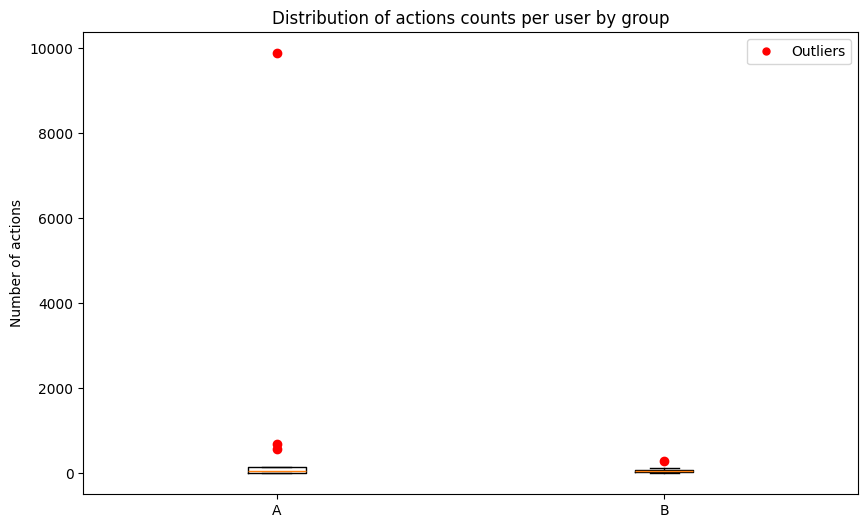

In [569]:
color = "red"

group_A = df_group_before[df_group_before['group'] == 'A']
group_B = df_group_before[df_group_before['group'] == 'B']
data = [group_A["achievement"], group_B["achievement"]]

plt.figure(figsize=(10, 6))
plt.boxplot(data, tick_labels=['A', 'B'], flierprops={'marker': 'o', 'markerfacecolor': color, 'markeredgecolor': color})
plt.title('Distribution of actions counts per user by group')
plt.ylabel('Number of actions', color='black')

outlier_legend = Line2D([0], [0], marker='o', color='w', label='Outliers', markerfacecolor=color, markeredgecolor=color, markersize=5)
plt.legend(handles=[outlier_legend])
plt.tick_params(colors='black')
plt.savefig('boxplot.actions-counts-per-user-by-group-outliers.png', transparent=True, bbox_inches='tight')
plt.show()


## Final data without outliers

In [548]:
final_df_without_outliners = cleaned_df[~cleaned_df['user'].isin(outlier_users)]
final_df_without_outliners

,user,achievement,points,game_mode,timestamp,group
1,7b25b9f2-5d8e-401e-aefa-ac31e94575d1,RefactorAddXAssertionsAchievement,2,Leaderboard,2025-04-17 09:04:05.979055+02:00,B
2,7b25b9f2-5d8e-401e-aefa-ac31e94575d1,AddTestsAchievement,1,Leaderboard,2025-04-17 09:04:05.992210+02:00,B
3,7b25b9f2-5d8e-401e-aefa-ac31e94575d1,RunXTestSuitesAchievement,1,Leaderboard,2025-04-17 09:04:09.168499+02:00,B
4,7b25b9f2-5d8e-401e-aefa-ac31e94575d1,RunWithCoverageAchievement,1,Leaderboard,2025-04-17 09:04:09.170740+02:00,B
5,d5082901-d846-4794-82af-2c7db8d50788,RefactorCodeAchievement,1,Leaderboard,2025-04-17 09:04:09.754310+02:00,B
...,...,...,...,...,...,...
4125,223bf16c-aaad-404f-8a47-61f3ced741e4,TriggerXAssertsByTestsAchievement,0,Leaderboard,2025-04-17 09:59:00.952909+02:00,A
4126,223bf16c-aaad-404f-8a47-61f3ced741e4,TriggerXAssertsByTestsAchievement,0,Leaderboard,2025-04-17 09:59:00.961069+02:00,A
4127,223bf16c-aaad-404f-8a47-61f3ced741e4,TriggerXAssertsByTestsAchievement,0,Leaderboard,2025-04-17 09:59:00.961241+02:00,A
4854,1d20c70c-aa71-49ff-abf5-6013870a28f8,RefactorAddXAssertionsAchievement,4,Leaderboard,2025-04-17 10:15:15.086513+02:00,A


In [549]:
interaction_counts = final_df_without_outliners.groupby('user')['achievement'].count()
interaction_counts

user
11555248-3f01-4d1c-9a71-ef7caf9150fa      4
1d20c70c-aa71-49ff-abf5-6013870a28f8      3
1f06f352-91b6-4373-87ed-5a5070723efb     81
223bf16c-aaad-404f-8a47-61f3ced741e4    138
2b2965f7-5d66-4569-802b-27c84aa69bff     28
3e58c347-cdf0-4139-93e0-1adf144753c4     16
465777bf-b8f8-4dbe-b99e-7e1c208be8dc     87
465f4b36-5fbb-415c-8e64-2401771ce91d      7
49ca41e9-25d5-4cf1-8157-94e27dfa3987      1
4d14cb87-b95e-4575-8823-f951391a3e6a     34
60716858-6fcb-4953-88e3-12a51b3c7c47     74
64330b4a-8b12-4c91-9b78-5942c1b9325f     64
674eeeb6-2534-419d-8965-63e4400f60c4    109
69f381b2-d619-4968-9db9-ec0e3b10f850      7
70c71a91-06a1-4bf4-8e56-f4327b1c8b3f    144
70e85b5e-92d4-498a-9079-ba881f5b3b82     75
7234f6dc-a316-4576-8453-6e10d7cf1c3d     47
72b5701e-d26c-49cb-a91b-6a3249246495     21
7b25b9f2-5d8e-401e-aefa-ac31e94575d1    112
88a83dd8-0ea0-41ad-93ca-d397d796fb37    131
a7c1124d-d4fc-4fc7-bb6f-b73e2f1b7fdd     44
afb0f9dc-6acf-48cd-a0e1-032f5df9366f     13
b39dc415-9bb6-4d5d-a8f9-30f

## Outliers stats

In [550]:
df_len = len(cleaned_df)
df_without_outliners_len = len(df_without_outliners)

print(f"Original dataset size: {df_len}")
print(f"Number of rows removed: {df_len - df_without_outliners_len}")
print(f"Dataset size after removing outliers: {df_without_outliners_len}")

Original dataset size: 13031
Number of rows removed: 11421
Dataset size after removing outliers: 1610


## Distribution of actions counts per user by group without outliers

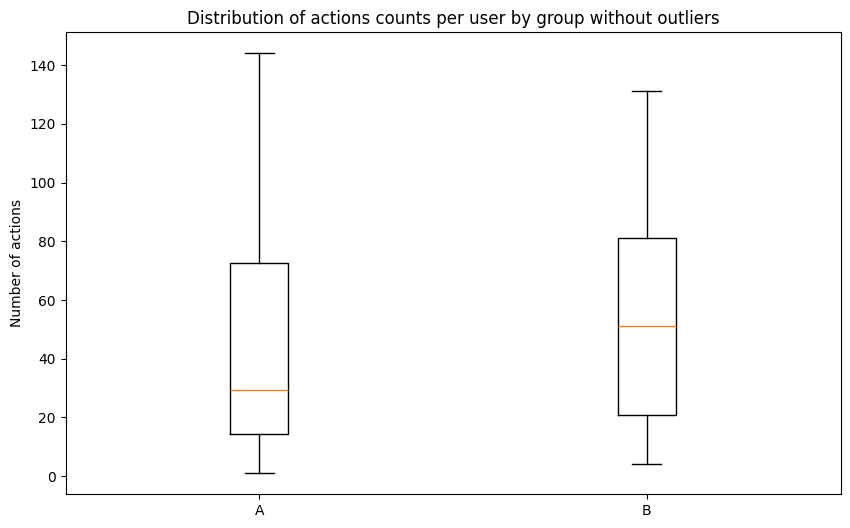

In [572]:
plt.figure(figsize=(10, 6))
df_without_outliners_grouped = df_without_outliners.groupby(['group', 'user'])['achievement'].count().reset_index()

group_A = df_without_outliners_grouped[df_without_outliners_grouped['group'] == 'A']
group_B = df_without_outliners_grouped[df_without_outliners_grouped['group'] == 'B']
data = [group_A['achievement'], group_B['achievement']]

plt.boxplot(data, tick_labels=['A', 'B'], flierprops={'marker': 'o', 'markerfacecolor': color, 'markeredgecolor': color})
plt.title('Distribution of actions counts per user by group without outliers', color='black')
plt.ylabel('Number of actions', color='black')
plt.tick_params(colors='black')
plt.savefig('boxplot.actions-counts-per-user-by-group-no-outlier.png', transparent=True, bbox_inches='tight')
plt.show()

## Save to csv

In [570]:
df_without_outliners

,user,achievement,points,game_mode,timestamp,group
1,7b25b9f2-5d8e-401e-aefa-ac31e94575d1,RefactorAddXAssertionsAchievement,2,Leaderboard,2025-04-17 09:04:05.979055+02:00,B
2,7b25b9f2-5d8e-401e-aefa-ac31e94575d1,AddTestsAchievement,1,Leaderboard,2025-04-17 09:04:05.992210+02:00,B
3,7b25b9f2-5d8e-401e-aefa-ac31e94575d1,RunXTestSuitesAchievement,1,Leaderboard,2025-04-17 09:04:09.168499+02:00,B
4,7b25b9f2-5d8e-401e-aefa-ac31e94575d1,RunWithCoverageAchievement,1,Leaderboard,2025-04-17 09:04:09.170740+02:00,B
5,d5082901-d846-4794-82af-2c7db8d50788,RefactorCodeAchievement,1,Leaderboard,2025-04-17 09:04:09.754310+02:00,B
...,...,...,...,...,...,...
4125,223bf16c-aaad-404f-8a47-61f3ced741e4,TriggerXAssertsByTestsAchievement,0,Leaderboard,2025-04-17 09:59:00.952909+02:00,A
4126,223bf16c-aaad-404f-8a47-61f3ced741e4,TriggerXAssertsByTestsAchievement,0,Leaderboard,2025-04-17 09:59:00.961069+02:00,A
4127,223bf16c-aaad-404f-8a47-61f3ced741e4,TriggerXAssertsByTestsAchievement,0,Leaderboard,2025-04-17 09:59:00.961241+02:00,A
4854,1d20c70c-aa71-49ff-abf5-6013870a28f8,RefactorAddXAssertionsAchievement,4,Leaderboard,2025-04-17 10:15:15.086513+02:00,A


In [445]:
df_without_outliners.to_csv("../../generated/database/csv/activity.csv", index=False)